### The Dataset

The datset which comes from Kaggle, summarizes the usage behaviour of around 9000 customers during the last 6 months in which there are 18 features. The dataset may be found at this link: https://www.kaggle.com/arjunbhasin2013/ccdata

In [115]:
#import the neccessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import time, umap
import seaborn as sns


import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture 

from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
#assigning the dataset to a dataframe
cc_df = pd.read_csv('CC_GENERAL.csv')

The following are the initial observations derived from the dataset.

In [3]:
cc_df.shape

(8950, 18)

The Dataset has 8950 observations and 18 features

In [4]:
#Retreiving information and getting the first few obsercations of the Dataset
cc_df.info()
cc_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Dealing with missing values from the Dataset

In [5]:
#Getting the sum of all missing values in each feature
cc_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
#getting the percentage of the missing values
cc_df.isnull().sum() / len(cc_df.isnull().sum())

CUST_ID                              0.000000
BALANCE                              0.000000
BALANCE_FREQUENCY                    0.000000
PURCHASES                            0.000000
ONEOFF_PURCHASES                     0.000000
INSTALLMENTS_PURCHASES               0.000000
CASH_ADVANCE                         0.000000
PURCHASES_FREQUENCY                  0.000000
ONEOFF_PURCHASES_FREQUENCY           0.000000
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000
CASH_ADVANCE_FREQUENCY               0.000000
CASH_ADVANCE_TRX                     0.000000
PURCHASES_TRX                        0.000000
CREDIT_LIMIT                         0.055556
PAYMENTS                             0.000000
MINIMUM_PAYMENTS                    17.388889
PRC_FULL_PAYMENT                     0.000000
TENURE                               0.000000
dtype: float64

There are only 2 features with missing values. The 'CREDIT_LIMIT' feature has about .05% missing values so it would be safe to drop these observations. The 'MINIMUM_PAYMENT' feature has about 17.39% missing values in which I will fill this values with a mean.

In [7]:
cc_df.dropna(subset=['CREDIT_LIMIT'],inplace=True)
cc_df.fillna(cc_df['MINIMUM_PAYMENTS'].mean(), inplace=True)

The following are the results of the missing values after applying techniques to handle them.

In [8]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

We turn the dataset into an array and drop the first feature which is 'CUST_ID'. The feature is dropped since the feature will not have any impact on the results.

In [9]:
X = np.asanyarray(cc_df)
X = cc_df.drop('CUST_ID', axis=1)
y = X['PAYMENTS']

We perform a standard scaler in order to standardize the feature.

In [10]:
scaler = StandardScaler()
x_std = scaler.fit_transform(X)

We perform PCA, pick 2 componments and assign it to a Dataframe to reduce dimensionality which will be later used in presenting the data visually

In [11]:
pca = PCA(n_components = 2) 
x_pca = pca.fit_transform(x_std) 
x_pca = pd.DataFrame(x_pca) 

## KMeans

We will be performing K-means to the Data

In [39]:
#First off, we perform Kmeans with 2 clusters.
k_means2 = KMeans(n_clusters=2).fit(x_pca)

y_pred2 = k_means2.fit_predict(x_pca)

In [40]:
k_means2.cluster_centers_

array([[-0.72630458, -0.02075762],
       [ 3.49702207,  0.09994411]])

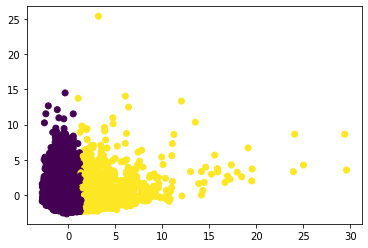

In [13]:
plt.scatter(x_pca[0], x_pca[1], c=y_pred2)
plt.show()

In [42]:
#Kmeans 3 clusters
k_means3 = KMeans(n_clusters=3).fit(x_pca)

y_pred3 = k_means3.fit_predict(x_pca)

In [43]:
k_means3.cluster_centers_

array([[-0.55944735, -0.76080852],
       [-0.81312273,  2.91612693],
       [ 3.97443387, -0.11005492]])

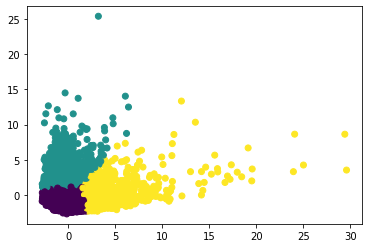

In [15]:
plt.scatter(x_pca[0], x_pca[1], c=y_pred3)
plt.show()

In [44]:
#Kmeans 4 clusters
k_means4 = KMeans(n_clusters=4).fit(x_pca)

y_pred4 = k_means4.fit_predict(x_pca)

In [45]:
k_means4.cluster_centers_

array([[-1.36184629, -0.197492  ],
       [ 6.00613848,  0.69205602],
       [-0.53705833,  3.41970349],
       [ 0.91526989, -1.16752737]])

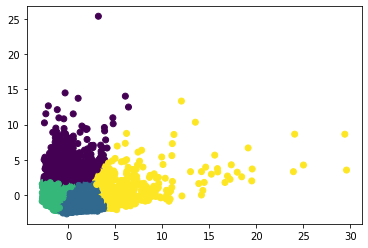

In [17]:
plt.scatter(x_pca[0], x_pca[1], c=y_pred4)
plt.show()

In [18]:
print("Silhouette score for TWO cluster k-means: {}".format(metrics.silhouette_score(x_std, y_pred2, metric='euclidean')))
print("Silhouette score for THREE cluster k-means: {}".format(metrics.silhouette_score(x_std, y_pred3, metric='euclidean')))
print("Silhouette score for FOUR cluster k-means: {}".format(metrics.silhouette_score(x_std, y_pred4, metric='euclidean')))

Silhouette score for TWO cluster k-means: 0.3097957845638396
Silhouette score for THREE cluster k-means: 0.24585118052664423
Silhouette score for FOUR cluster k-means: 0.18408667126098352


#### The Elbow Criterion

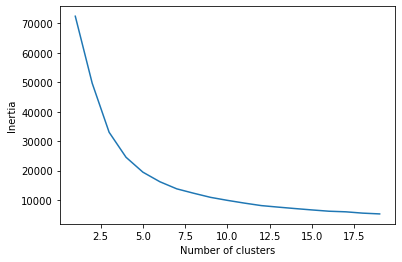

In [38]:
inert = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=300).fit(x_pca)
    inert[k] = kmeans.inertia_ 
plt.plot(list(inert.keys()), list(inert.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

#### K-Means Summary 

Based on the the solhouette score and the plots above, it seems like that the K-Means method with Two clusters performed its best. The __2 clusters K-Means__ plot had the best grouping and also had the __highest Silhouette score of .30__ amongst the others.

## Heirarchical Clustering

In [20]:
# Defining agglomerative clustering
agg_cluster2 = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit mode
clusters2 = agg_cluster2.fit_predict(x_std)

In [21]:
# Defining agglomerative clustering
agg_cluster3 = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters3 = agg_cluster3.fit_predict(x_std)

In [22]:
# Defining agglomerative clustering
agg_cluster4 = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=4)

# Fit model
clusters4 = agg_cluster4.fit_predict(x_std)

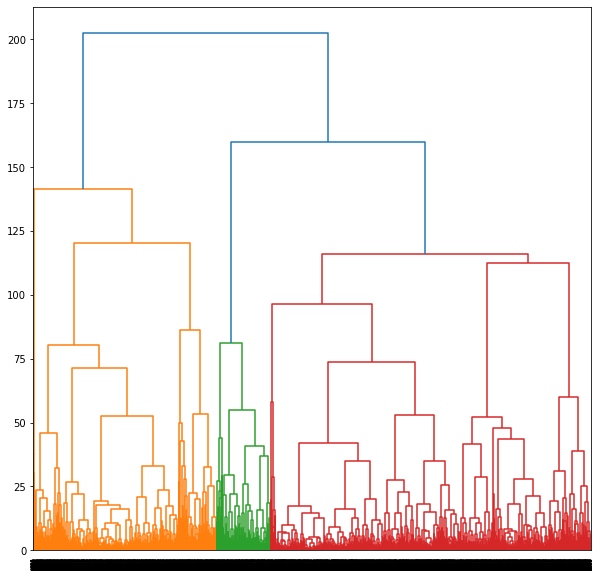

In [23]:
#plotting using the ward method
plt.figure(figsize=(10,10))
dendrogram(linkage(x_std, method='ward'))
plt.show()

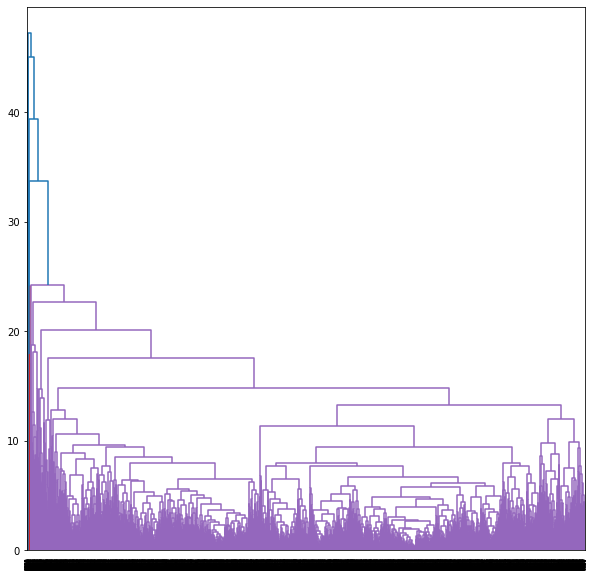

In [24]:
#plotting  using the complete method
plt.figure(figsize=(10,10))
dendrogram(linkage(x_std, method='complete'))
plt.show()

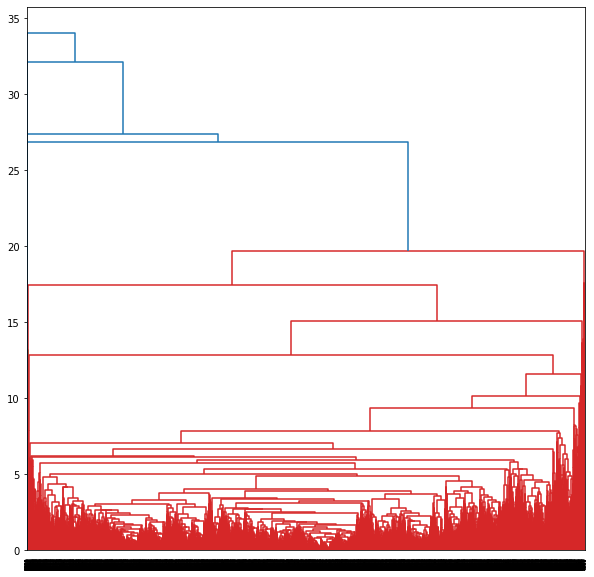

In [25]:
#plotting using the average method
plt.figure(figsize=(10,10))
dendrogram(linkage(x_std, method='average'))
plt.show()

#### Hierarichal Clustering: Dendogram Plot Summary

Amongst the several methods in presenting the data in a dendrogram, the __ward__ method has perfomed the best.

#### Retreiving the Adjusted Rand Index scores

In [35]:
print("The ARI of the Clustering solution with 2 clusters: {}".format(metrics.adjusted_rand_score(y, clusters2)))
print("The ARI of the Clustering solution with 3 clusters: {}".format(metrics.adjusted_rand_score(y, clusters3)))
print("The ARI of the Clustering solution with 4 clusters: {}".format(metrics.adjusted_rand_score(y, clusters4)))

The ARI of the Agglomerative Clustering solution: 0.000722663016314787
The ARI of the Agglomerative Clustering solution: 0.0010231094289274822
The ARI of the Agglomerative Clustering solution: 0.0010323623431909294


## GMM

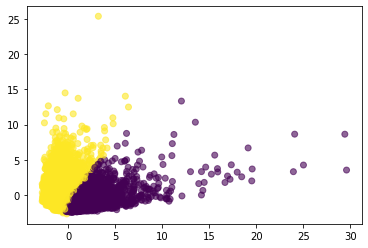

In [55]:
gmm2 = GaussianMixture(n_components = 2).fit_predict(x_pca)

# Visualizing the clustering 
plt.scatter(x_pca[0], x_pca[1],  
           c = gmm2, alpha = 0.6) 
plt.show() 

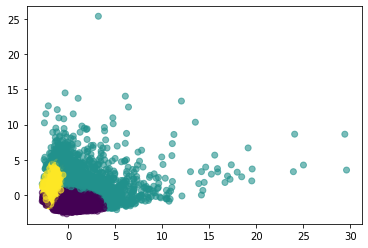

In [56]:
gmm3 = GaussianMixture(n_components = 3).fit_predict(x_pca)

# Visualizing the clustering 
plt.scatter(x_pca[0], x_pca[1],  
           c = gmm3, alpha = 0.6) 
plt.show() 

In [65]:
print("ARI of the GMM solution with 2 clusters: {}".format(metrics.adjusted_rand_score(y, gmm2)))
print("The silhoutte score of the GMM solution with 2 clusters: {}"
      .format(metrics.silhouette_score(x_std, gmm2, metric='euclidean')))

ARI of the GMM solution with 2 clusters: 0.000714915275690016
The silhoutte score of the GMM solution with 2 clusters: 0.20747821392266697


In [64]:
print("ARI of the GMM solution with 3 clusters: {}".format(metrics.adjusted_rand_score(y, gmm3)))
print("The silhoutte score of the GMM solution with 3 clusters: {}"
      .format(metrics.silhouette_score(x_std, gmm3, metric='euclidean')))

ARI of the GMM solution with 3 clusters: 0.00022031002368267633
The silhoutte score of the GMM solution with 3 clusters: 0.13519189919412744


#### GMM Summary

According to the representation in the plot, the Gaussian mixture model which performed the best is the __plot with 2 clusters__ as it is represented. Additionally, with an __ARI score of .0072__ and a __Silhoutte score of 0.21__. The 2 cluster model also perfored at its best.

## DBSCAN

In [69]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(x_std)

In [70]:
# Defining the agglomerative clustering
dbscan_cluster2 = DBSCAN(eps=2, min_samples=5)

# Fit model
clusters2 = dbscan_cluster2.fit_predict(x_std)

In [72]:
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters2)))

Adjusted Rand Index of the DBSCAN solution: 0.0004450676846274157
Adjusted Rand Index of the DBSCAN solution: 0.000152613948933557


In [71]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(x_std, clusters, metric='euclidean')))
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(x_std, clusters2, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.24870304051754172
The silhouette score of the DBSCAN solution: 0.39700255783539556


#### DBSCAN Summary

The DBSCAN method is currently inconclusive, The ARI score and Sihoutte scores did not give good estimates which may need further analysis. For the time being we will not proceed with any plots as to the scores still needs improvements.

## PCA

In [101]:
pca = PCA(n_components=2)

pca_comp = pca.fit_transform(x_std)

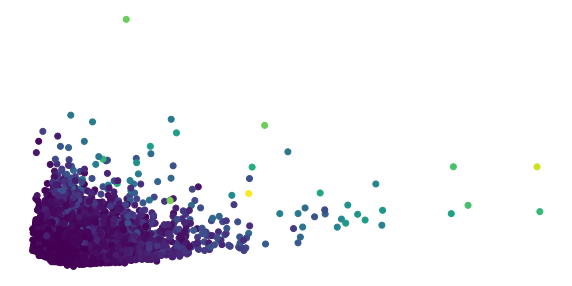

In [150]:
plt.figure(figsize=(10,5))

cm = plt.cm.get_cmap('RdYlBu')

plt.scatter(pca_comp[:, 0], pca_comp[:, 1], c=y)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## t-SNE

In [93]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8949 samples in 0.073s...
[t-SNE] Computed neighbors for 8949 samples in 4.274s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8949
[t-SNE] Computed conditional probabilities for sample 2000 / 8949
[t-SNE] Computed conditional probabilities for sample 3000 / 8949
[t-SNE] Computed conditional probabilities for sample 4000 / 8949
[t-SNE] Computed conditional probabilities for sample 5000 / 8949
[t-SNE] Computed conditional probabilities for sample 6000 / 8949
[t-SNE] Computed conditional probabilities for sample 7000 / 8949
[t-SNE] Computed conditional probabilities for sample 8000 / 8949
[t-SNE] Computed conditional probabilities for sample 8949 / 8949
[t-SNE] Mean sigma: 0.469249
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.709686
[t-SNE] KL divergence after 300 iterations: 2.515662
t-SNE done! Time elapsed: 23.39329767227173 seconds


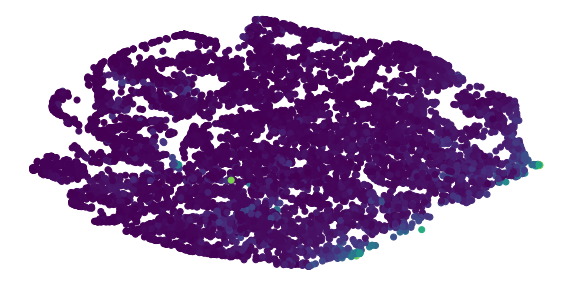

In [146]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## UMAP

In [148]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.5,
                      metric='correlation').fit_transform(x_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 8.880636930465698 seconds


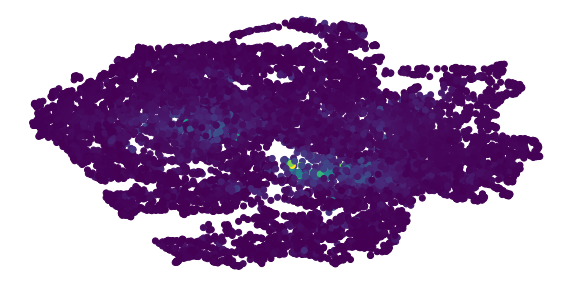

In [149]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:,0], umap_results[:,1], c=y)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Summary

__Models:__ Amongst the models and clusters tried in the plots above, the __KMeans model__ with a __cluster of 2__ performed it's best with an Silhoutte score of .30. The heirarchical dendrogram performed at its best when using the __ward__ method.

__Dimension Reduction:__ The dimensionality reduction models are in need of more processes such as further feature selection, data preparation and normalization to get a better plot. At this point, the plots does not show conclusive or a great evidence of success in representation.